<a href="https://colab.research.google.com/github/Behnaz81/MachineLearningDaily/blob/main/Day07_XGBoost_Pipeline/MachineLearning7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is Boosting?

Boosting in machine learning is an ensemble method where multiple "weak learners" are combined sequentially to create a strong predictive model. Each weak learner is trained iteratively, with each new learner focusing on correcting the errors made by its predecessors. This sequential training and error correction leads to a more accurate and robust final model.

Boosting's effectiveness in machine learning stems from its ability to improve model accuracy and generalization by sequentially combining weak learners. It reduces bias and variance, and handles complex data and imbalanced datasets well.

## What is the difference between gradient boosting and random forest?

Gradient boosting and Random Forests are both ensemble learning methods that use decision trees, but they differ significantly in how they build and combine these trees. Gradient boosting sequentially trains trees, with each new tree aiming to correct the errors of previous trees, while Random Forests build trees independently in parallel. This difference leads to distinct strengths and weaknesses in each algorithm.

## why is xgboost so popular?

XGBoost's popularity stems from its excellent combination of prediction accuracy and processing speed, making it a strong choice for data scientists across various applications. It's known for being robust, flexible, scalable, and provides insights through feature importance, contributing to its widespread adoption in machine learning competitions like Kaggle.

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading Dataset

In [3]:
X = load_breast_cancer().data
y = load_breast_cancer().target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Building Pipeline

In scikit-learn, a pipeline is a tool to streamline machine learning workflows by combining multiple data processing steps and a final estimator (like a classifier or regressor) into a single object. This simplifies the process of data preprocessing, model training, and prediction.

In [5]:
pipe = Pipeline([('scaler', StandardScaler()), ('GXBoost', GradientBoostingClassifier())])

In [6]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.965034965034965

In [11]:
skf = StratifiedKFold(n_splits=10)
result = cross_validate(pipe, X, y, cv=skf, return_train_score=False)
print("Average fit time:", np.mean(result['fit_time']))
print("Average score time:", np.mean(result['score_time']))
print("Average accuracy:", np.mean(result['test_score']))

Average fit time: 1.044158697128296
Average score time: 0.0023430585861206055
Average accuracy: 0.9631578947368421


In [12]:
print(classification_report(y_test, pipe.fit(X_train, y_train).predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.98      0.98      0.98        87

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



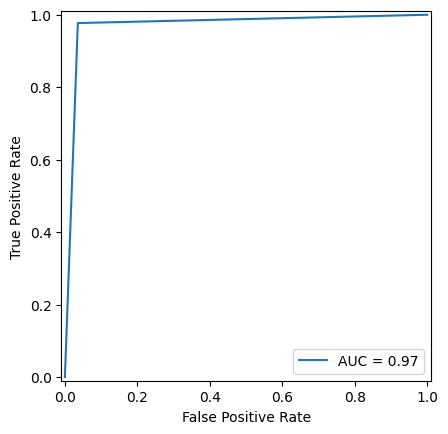

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, pipe.fit(X_train, y_train).predict(X_test))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

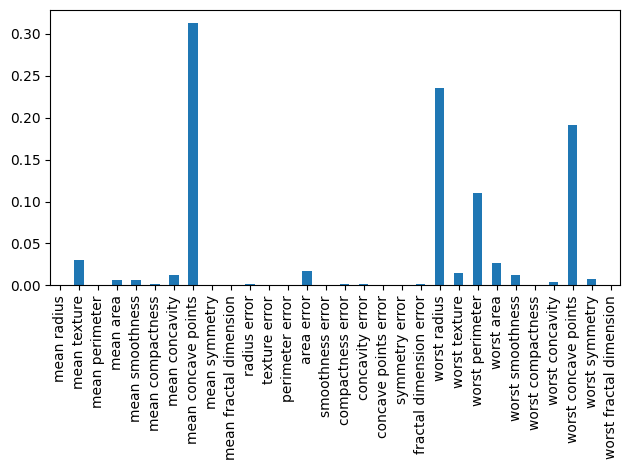

In [14]:
importances = pipe.steps[1][1].feature_importances_
forest_importances = pd.Series(importances, index=load_breast_cancer().feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
fig.tight_layout()